1)Considere o conjunto de dados disponível em artificial1d.csv organizado em
duas colunas, x e y. Seja um modelo de regressão linear para yˆ = f(x).

a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio)
obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote
a reta resultante sobre os dados

MSE:  0.21410418745033177
w:  [-1.04083409e-17  8.86507649e-01]


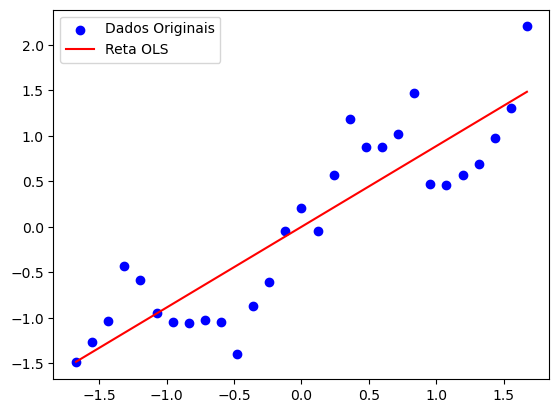

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

artificial = pd.read_csv("artificial1d.csv")
#normalizando esse dataset, temos:
X = artificial
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_norm = (X - mu) / sigma

#separando os dados: 
y = X_norm.to_numpy()[:, -1]
X = X_norm.to_numpy()[:, :-1]
X = np.c_[np.ones(X.shape[0]), X] # Adicionando o bias

w = np.linalg.inv(X.T @ X) @ X.T @ y 

y_pred = X @ w
mse=lambda y, y_pred: np.mean((y - y_pred) ** 2)
MSE = mse(y, y_pred)
print("MSE: ", MSE)
print("w: ", w)
#plotando
plt.scatter(X[:, 1], y, color='blue', label='Dados Originais')
plt.plot(X[:, 1], y_pred, color='red', label='Reta OLS')
plt.legend()
plt.show()


b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.


Iteração 0: w = [0. 0.], gradiente = [-1.18673268e-17 -8.86507649e-01], alpha = 0.0095
Iteração 100: w = [-4.99833016e-18  5.45384502e-01], gradiente = [ 4.55998255e-17 -3.41123147e-01], alpha = 0.009025
Iteração 200: w = [-1.76179553e-17  7.48795325e-01], gradiente = [-3.13531468e-18 -1.37712325e-01], alpha = 0.00857375
Iteração 300: w = [-2.50963191e-17  8.28321925e-01], gradiente = [-1.42055176e-17 -5.81857247e-02], alpha = 0.0081450625
Iteração 400: w = [-2.96826009e-17  8.60836539e-01], gradiente = [ 2.11807322e-17 -2.56711109e-02], alpha = 0.007737809374999999
w_final:  [-3.56793585e-17  8.73654196e-01]
MSE GD:  0.21426939871296594


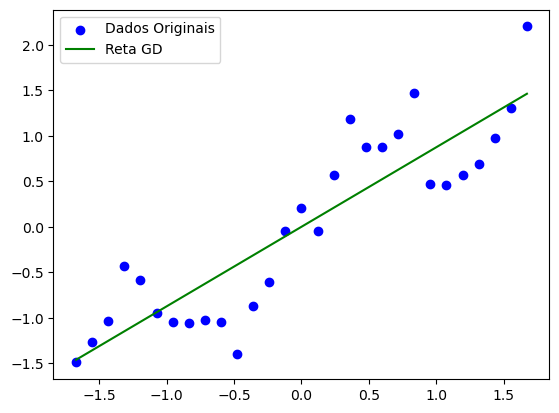

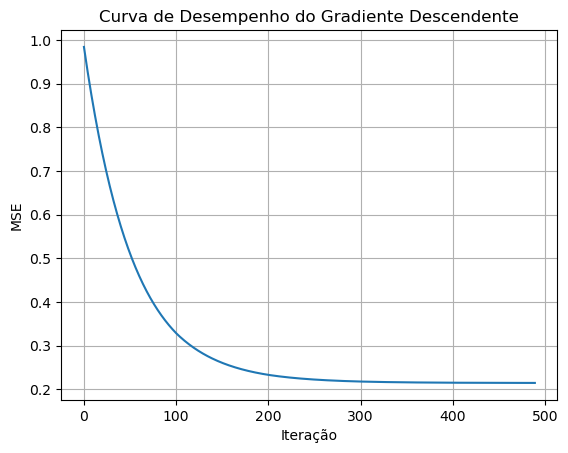

In [48]:




def gradiente_descendente(X, y, w, alpha=0.01, tol=1e-3, max_iter=1000):
    m = len(y)
    custos = []
    for i in range(max_iter):
        gradiente = (1/m) * X.T @ (X @ w - y)
        w_novo = w - alpha * gradiente
        custos.append(mse(y, X @ w_novo))
        if i % 100 == 0:
            alpha = alpha * 0.95
            print(f"Iteração {i}: w = {w.T}, gradiente = {gradiente.T}, alpha = {alpha}")
        if np.linalg.norm(w_novo - w) < tol:
            break
        w = w_novo
    else:
        raise ValueError("não convergiu")
    return w, custos

w_inicial = np.zeros(X.shape[1])
w_final, custos = gradiente_descendente(X, y, w_inicial, alpha=0.01, tol=1e-4, max_iter=1000)
print("w_final: ", w_final)

y_pred_gd = X @ w_final
mse_gd = mse(y, y_pred_gd)
print("MSE GD: ", mse_gd)

# plotando os dados e a reta
plt.scatter(X[:, 1], y, color='blue', label='Dados Originais')
plt.plot(X[:, 1], y_pred_gd, color='green', label='Reta GD')
plt.legend()
plt.show()

# plotando a  curva de desempenho
plt.plot(custos)
plt.xlabel("Iteração")
plt.ylabel("MSE")
plt.title("Curva de Desempenho do Gradiente Descendente")
plt.grid(True)
plt.show()


c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo SGD (gradiente descendente estocástico).
Plote a reta resultante sobre os dados.

w_sgd:  [[-0.00419762]
 [ 0.88612903]]
MSE SGD:  0.2141219507790784


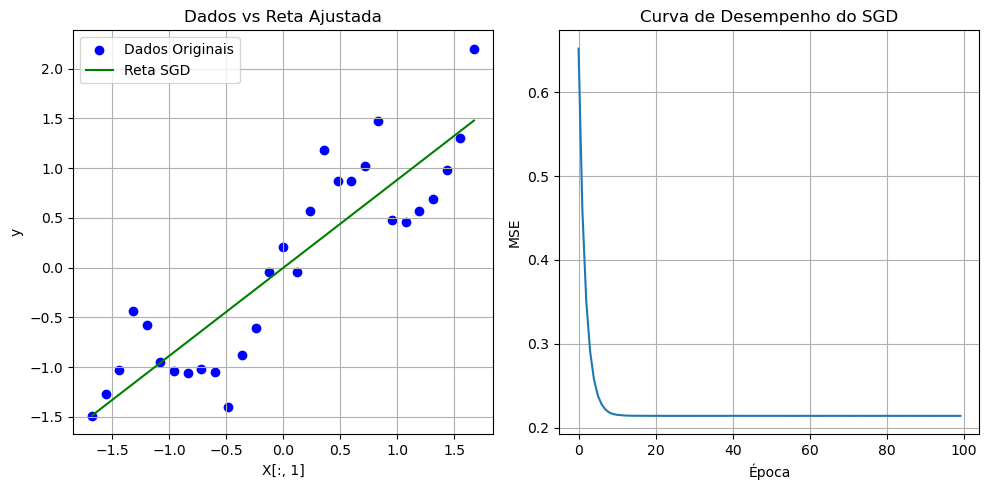

In [50]:
# Implementação do Gradiente Descendente Estocástico (SGD)
# O SGD é uma variação do gradiente descendente que atualiza os pesos para cada amostra individualmente, em vez de usar o conjunto completo de dados.

def sgd(X, y, w, alpha=0.01, epochs=100):
    m = len(y)
    w_history = [w.copy()]
    custos = []
    
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        
        for i in indices:
            X_i = X[i:i+1]  
            y_i = y[i]
            y_pred = X_i @ w  
            e = y_i - y_pred[0][0]
            w = w + alpha * e * X_i.T
        
        w_history.append(w.copy())
        y_pred_all = X @ w  
        custo = np.mean((y - y_pred_all.ravel()) ** 2)
        custos.append(custo)
    
    return w, w_history, custos

w_inicial = np.zeros((X.shape[1], 1))
w_sgd, w_history, custos_sgd = sgd(X, y, w_inicial)
print("w_sgd: ", w_sgd)
y_pred_sgd = (X @ w_sgd).ravel()
mse_sgd = np.mean((y - y_pred_sgd) ** 2)
print("MSE SGD: ", mse_sgd)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 1], y, color='blue', label='Dados Originais')
plt.plot(X[:, 1], y_pred_sgd, color='green', label='Reta SGD')
plt.xlabel('X[:, 1]')
plt.ylabel('y')
plt.title('Dados vs Reta Ajustada')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(custos_sgd)
plt.xlabel("Época")
plt.ylabel("MSE")
plt.title("Curva de Desempenho do SGD")
plt.grid(True)

plt.tight_layout()
plt.show()

# **Se os gráficos de GTA VI são realistas agradeça a este algorítmo**

*QUESTÃO 2*

Considere o conjunto de dados disponível em california.csv, organizado em 9
colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.
Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/real_
world.html#california-housing-dataset.

a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [ ]:
from sklearn.datasets import fetch_california_housing


def train_test_split_manual(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    m = X.shape[0]
    indices = np.random.permutation(m)
    
    test_count = int(m * test_size)
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test




data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



X_train shape: (16512, 8)
X_test shape: (4128, 8)


b)  Treine 6 modelos de regressão polinomial, com ordens de 1 a 6. Você
pode usar o algoritmo OLS.

Grau 1: RMSE Treino = 0.4491, RMSE Teste = 0.5302


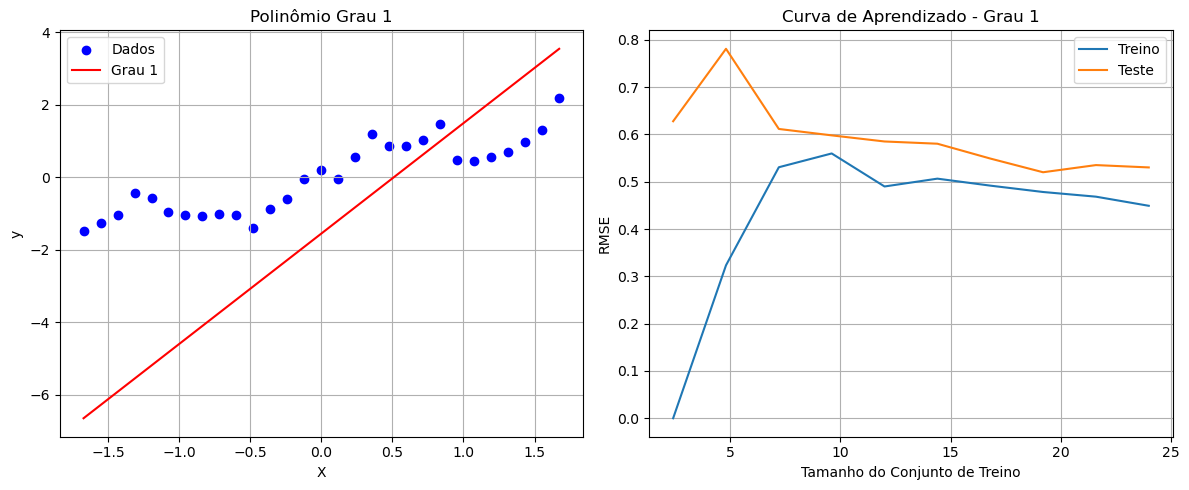

Grau 2: RMSE Treino = 0.4471, RMSE Teste = 0.5225


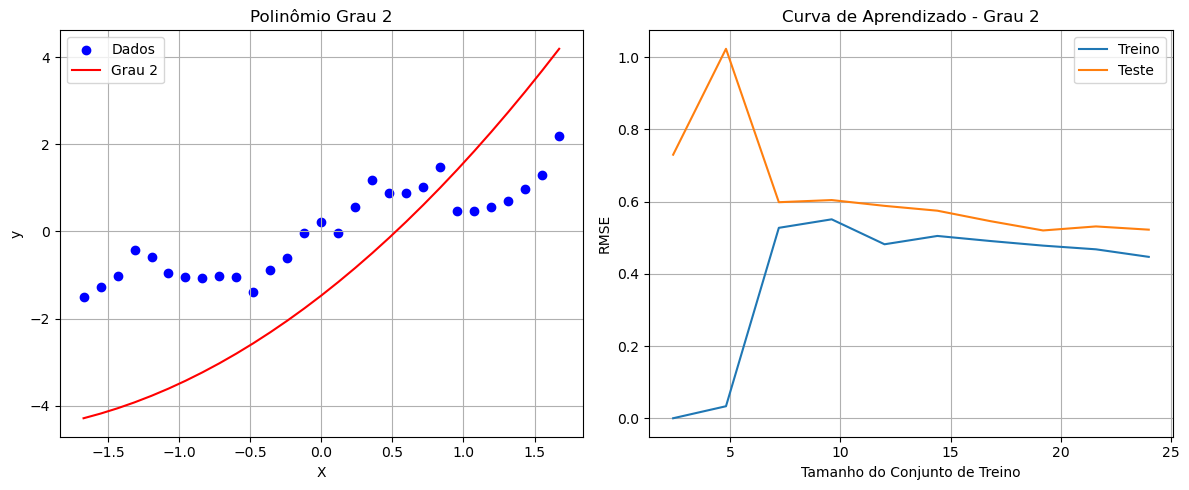

Grau 3: RMSE Treino = 0.4337, RMSE Teste = 0.4983


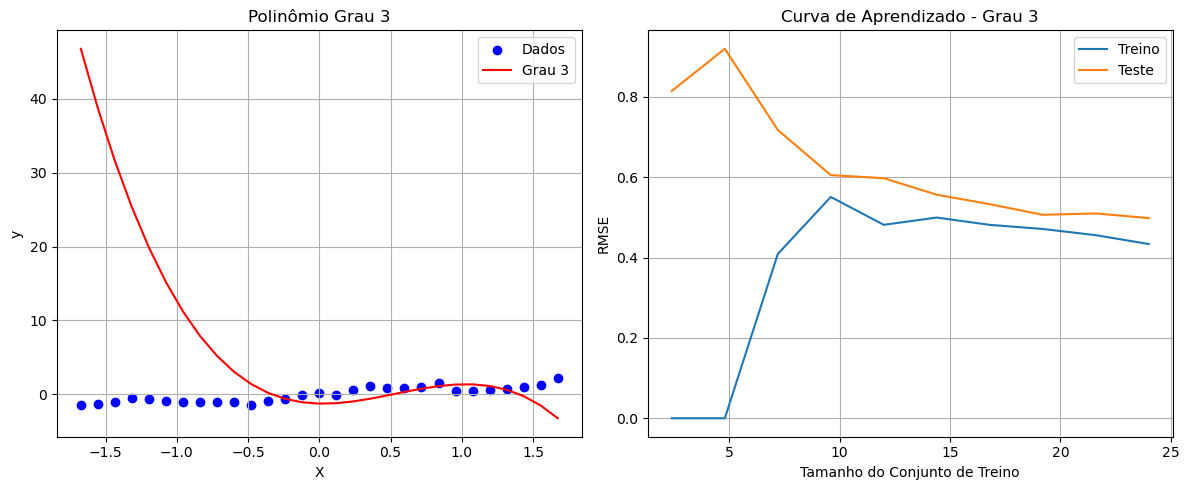

Grau 4: RMSE Treino = 0.4182, RMSE Teste = 0.5315


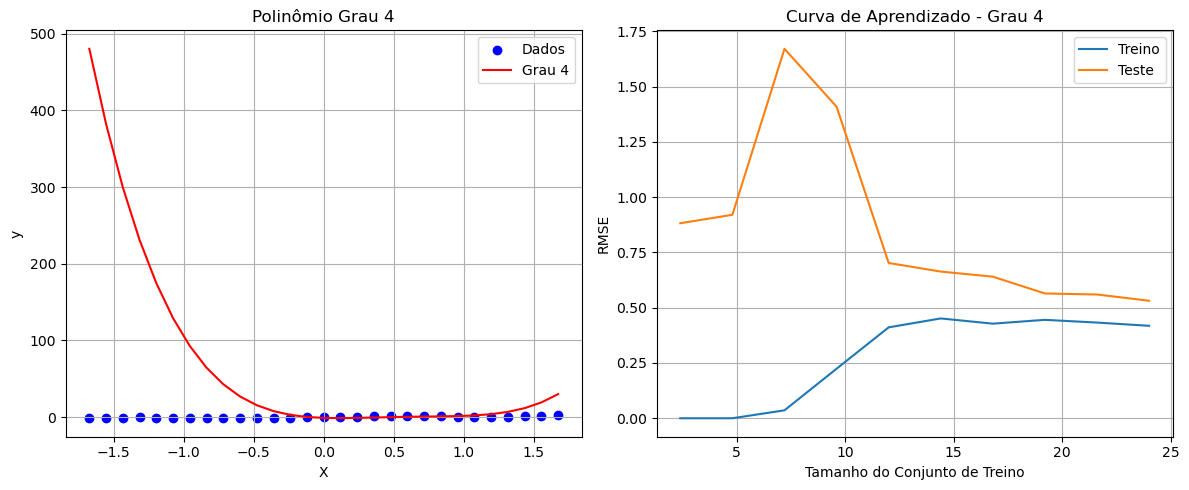

Grau 5: RMSE Treino = 0.2148, RMSE Teste = 0.2489


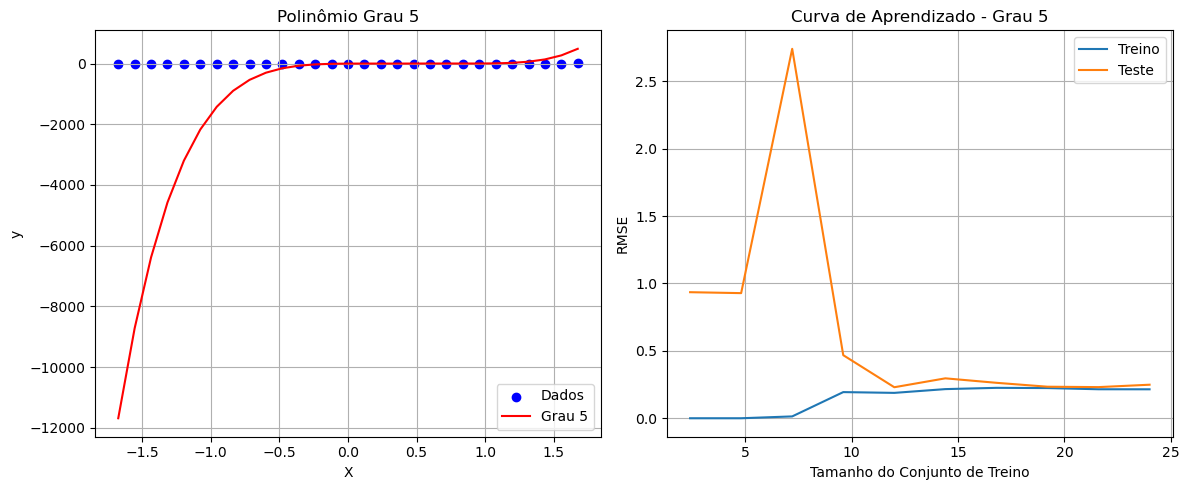

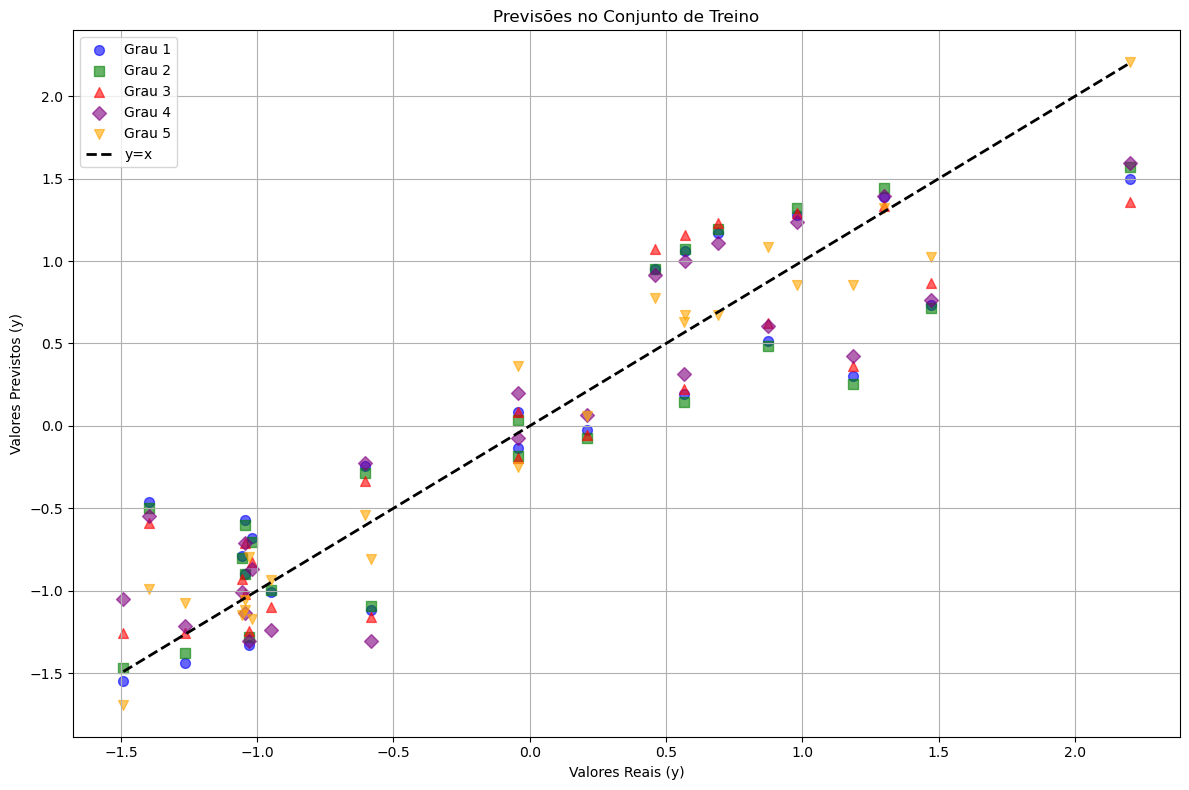

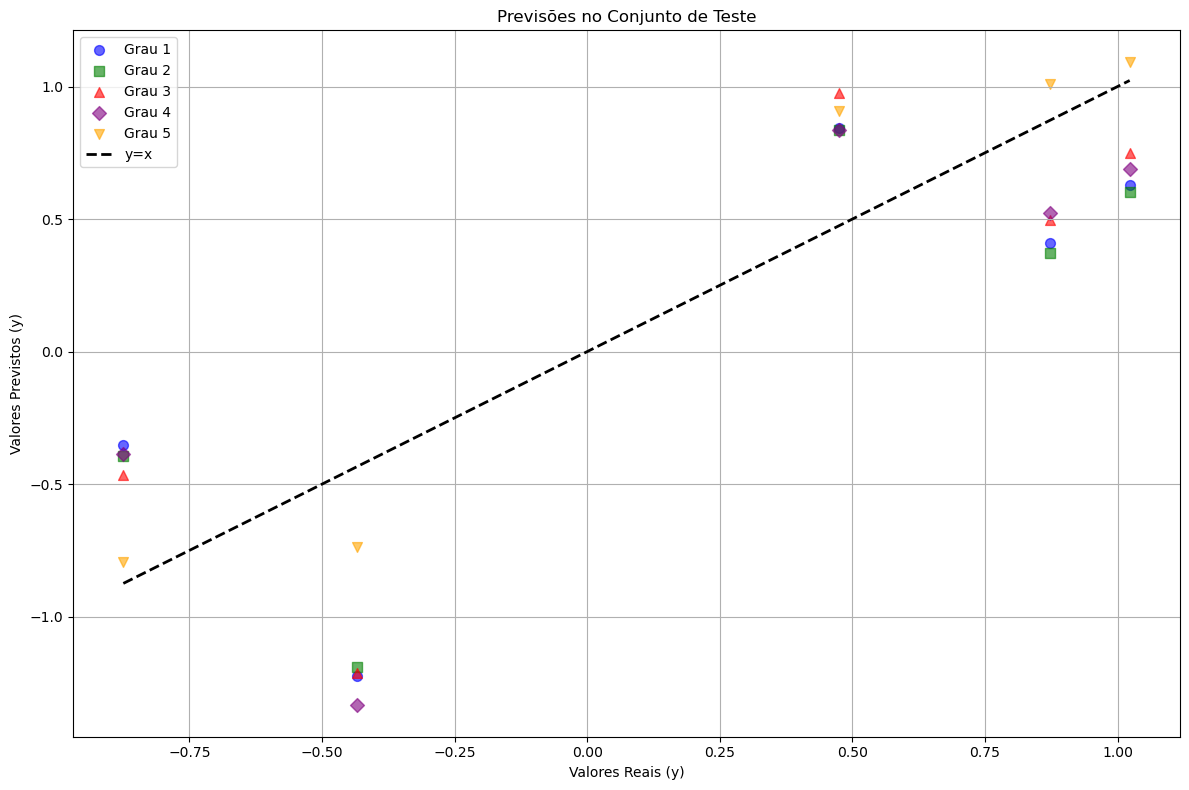

In [51]:

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
scaler_X = MinMaxScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split_manual(X_scaled, y_scaled, test_size=0.2, random_state=666)

graus_testados = []
train_errors = []
test_errors = []
train_predictions = []
test_predictions = []

for grau in range(1, 6):
    poly = PolynomialFeatures(degree=grau, include_bias=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # OLS (método analítico)
    XT_X = X_train_poly.T @ X_train_poly
    XT_y = X_train_poly.T @ y_train
    w = np.linalg.pinv(XT_X) @ XT_y

    y_train_pred_scaled = X_train_poly @ w
    y_test_pred_scaled = X_test_poly @ w

    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
    y_train_real = scaler_y.inverse_transform(y_train)
    y_test_real = scaler_y.inverse_transform(y_test)

    rmse_train = np.sqrt(np.mean((y_train_real - y_train_pred) ** 2))
    rmse_test = np.sqrt(np.mean((y_test_real - y_test_pred) ** 2))

    graus_testados.append(grau)
    train_errors.append(rmse_train)
    test_errors.append(rmse_test)
    train_predictions.append(y_train_pred.ravel())
    test_predictions.append(y_test_pred.ravel())

    print(f"Grau {grau}: RMSE Treino = {rmse_train:.4f}, RMSE Teste = {rmse_test:.4f}")

    # Polinômio vs Dados
    X_orig = scaler_X.inverse_transform(X_scaled)
    X_sort = np.sort(X_orig[:, 1])
    X_poly_sort = poly.transform(np.c_[np.ones_like(X_sort), X_sort])
    y_poly_pred = scaler_y.inverse_transform(X_poly_sort @ w)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X_orig[:, 1], scaler_y.inverse_transform(y_scaled), color='blue', label='Dados')
    plt.plot(X_sort, y_poly_pred, color='red', label=f'Grau {grau}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polinômio Grau {grau}')
    plt.legend()
    plt.grid(True)

    # Curva de aprendizado simulada (erros por tamanho de dados)
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_errs = []
    test_errs = []
    for size in train_sizes:
        idx = int(len(X_train) * size)
        X_subset = X_train[:idx]
        y_subset = y_train[:idx]
        X_subset_poly = poly.transform(X_subset)
        w_subset = np.linalg.pinv(X_subset_poly.T @ X_subset_poly) @ (X_subset_poly.T @ y_subset)
        y_train_subset_pred = scaler_y.inverse_transform(X_subset_poly @ w_subset)
        y_test_subset_pred = scaler_y.inverse_transform(X_test_poly @ w_subset)
        train_errs.append(np.sqrt(np.mean((scaler_y.inverse_transform(y_subset) - y_train_subset_pred) ** 2)))
        test_errs.append(np.sqrt(np.mean((y_test_real - y_test_subset_pred) ** 2)))

    plt.subplot(1, 2, 2)
    plt.plot(train_sizes * len(X_train), train_errs, label='Treino')
    plt.plot(train_sizes * len(X_train), test_errs, label='Teste')
    plt.xlabel('Tamanho do Conjunto de Treino')
    plt.ylabel('RMSE')
    plt.title(f'Curva de Aprendizado - Grau {grau}')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'grau_{grau}.png')
    plt.show()

# Gráficos originais
plt.figure(figsize=(12, 8))
y_train_orig = scaler_y.inverse_transform(y_train)
colors = ['blue', 'green', 'red', 'purple', 'orange']
markers = ['o', 's', '^', 'D', 'v']
for grau, y_pred, color, marker in zip(graus_testados, train_predictions, colors, markers):
    plt.scatter(y_train_orig, y_pred, color=color, marker=marker, label=f'Grau {grau}', alpha=0.6, s=50)
plt.plot([y_train_orig.min(), y_train_orig.max()], [y_train_orig.min(), y_train_orig.max()], color='black', linestyle='--', linewidth=2, label='y=x')
plt.xlabel("Valores Reais (y)")
plt.ylabel("Valores Previstos (y)")
plt.title("Previsões no Conjunto de Treino")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('train_predictions.png')
plt.show()

plt.figure(figsize=(12, 8))
y_test_orig = scaler_y.inverse_transform(y_test)
for grau, y_pred, color, marker in zip(graus_testados, test_predictions, colors, markers):
    plt.scatter(y_test_orig, y_pred, color=color, marker=marker, label=f'Grau {grau}', alpha=0.6, s=50)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], color='black', linestyle='--', linewidth=2, label='y=x')
plt.xlabel("Valores Reais (y)")
plt.ylabel("Valores Previstos (y)")
plt.title("Previsões no Conjunto de Teste")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('test_predictions.png')
plt.show()

Use regularização de lambda=0.01 agora

Resultados dos Modelos Polinomiais com Regularização L2 (λ = 0.01):
--------------------------------------------------
Grau 1:
  RMSE Treino = 0.4491
  RMSE Teste  = 0.5292
--------------------------------------------------
Grau 2:
  RMSE Treino = 0.4472
  RMSE Teste  = 0.5203
--------------------------------------------------
Grau 3:
  RMSE Treino = 0.4411
  RMSE Teste  = 0.5138
--------------------------------------------------
Grau 4:
  RMSE Treino = 0.4394
  RMSE Teste  = 0.5069
--------------------------------------------------
Grau 5:
  RMSE Treino = 0.4393
  RMSE Teste  = 0.5072
--------------------------------------------------
Grau 6:
  RMSE Treino = 0.4336
  RMSE Teste  = 0.5095
--------------------------------------------------


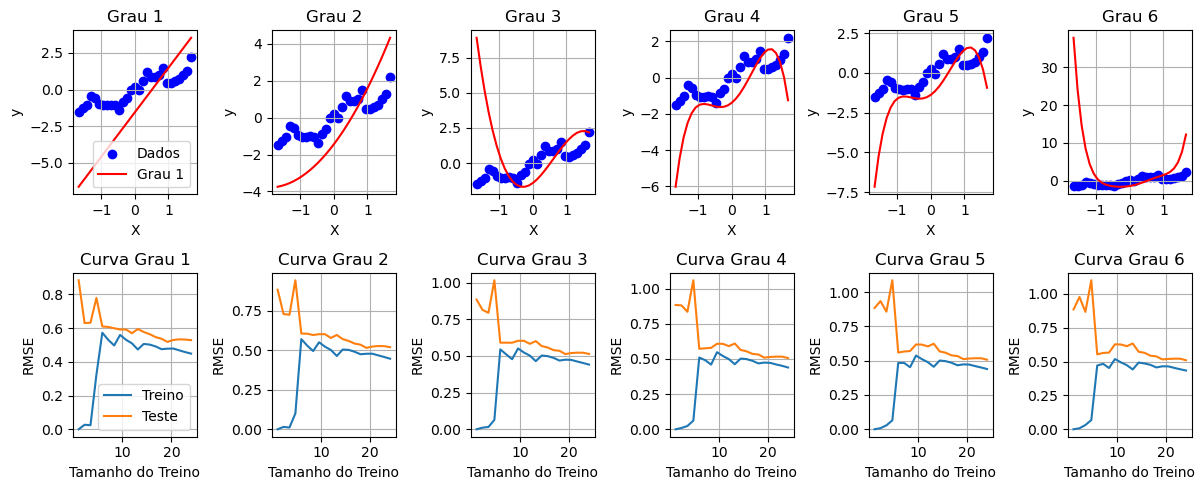

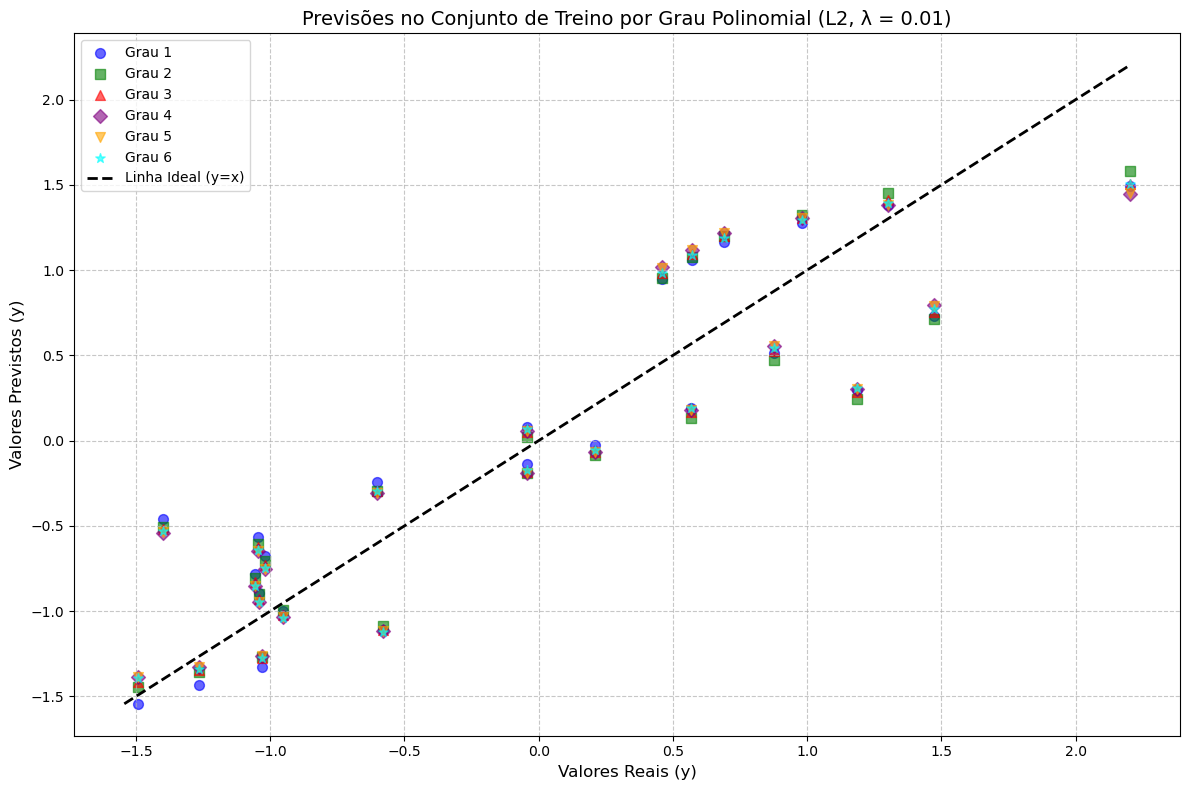

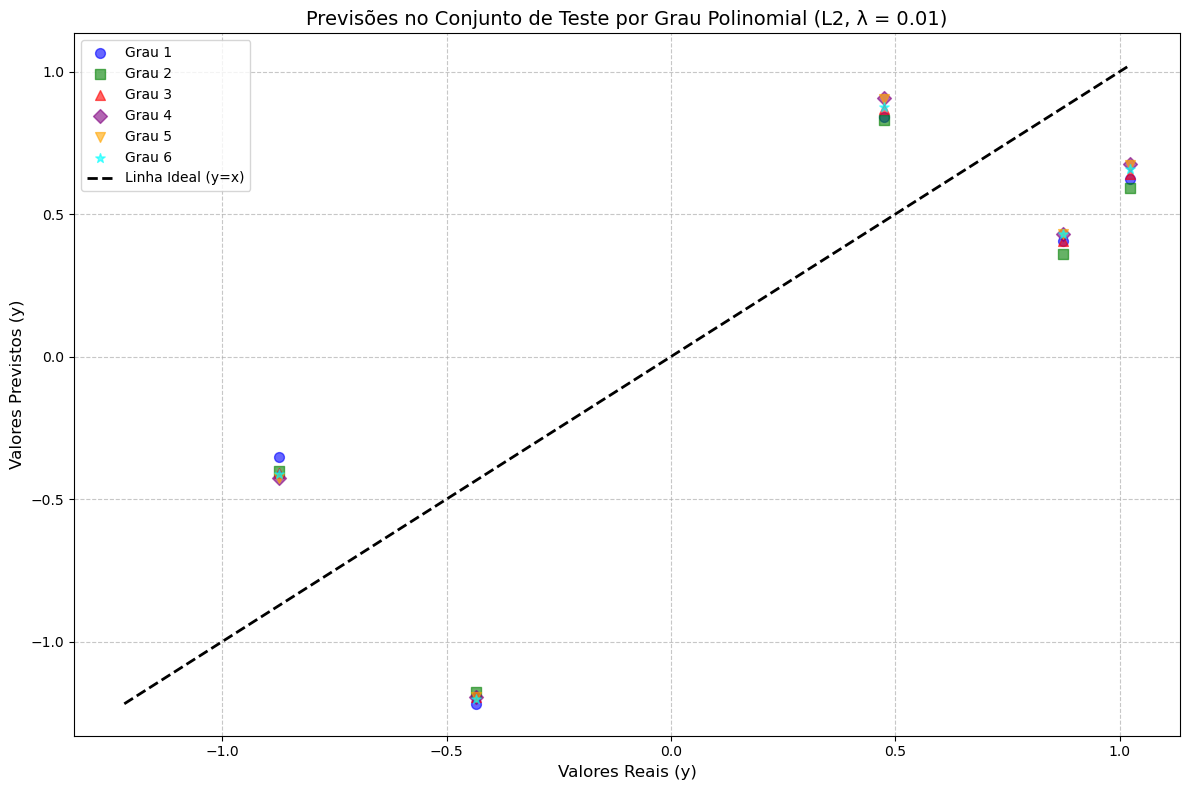

In [60]:
lambda_reg = 0.01

graus_testados = []
train_errors = []
test_errors = []
train_predictions = []
test_predictions = []

print("Resultados dos Modelos Polinomiais com Regularização L2 (λ = 0.01):")
print("-" * 50)
for grau in range(1, 7):
    poly = PolynomialFeatures(degree=grau, include_bias=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    XT_X = X_train_poly.T @ X_train_poly
    identity = np.eye(XT_X.shape[0])
    identity[0, 0] = 0
    XT_X_reg = XT_X + lambda_reg * identity
    XT_y = X_train_poly.T @ y_train
    w = np.linalg.pinv(XT_X_reg) @ XT_y

    y_train_pred_scaled = X_train_poly @ w
    y_test_pred_scaled = X_test_poly @ w

    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
    y_train_real = scaler_y.inverse_transform(y_train)
    y_test_real = scaler_y.inverse_transform(y_test)

    rmse_train = np.sqrt(mse(y_train_real, y_train_pred))
    rmse_test = np.sqrt(mse(y_test_real, y_test_pred))

    graus_testados.append(grau)
    train_errors.append(rmse_train)
    test_errors.append(rmse_test)
    train_predictions.append(y_train_pred)
    test_predictions.append(y_test_pred)

    print(f"Grau {grau}:")
    print(f"  RMSE Treino = {rmse_train:.4f}")
    print(f"  RMSE Teste  = {rmse_test:.4f}")
    print("-" * 50)

plt.figure(figsize=(12, 5))
for grau in range(1, 7):
    poly = PolynomialFeatures(degree=grau, include_bias=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    XT_X = X_train_poly.T @ X_train_poly
    identity = np.eye(XT_X.shape[0])
    identity[0, 0] = 0
    XT_X_reg = XT_X + lambda_reg * identity
    XT_y = X_train_poly.T @ y_train
    w = np.linalg.pinv(XT_X_reg) @ XT_y

    X_orig = scaler_X.inverse_transform(X_scaled)
    X_sort = np.sort(X_orig[:, 1])
    X_poly_sort = poly.transform(np.c_[np.ones_like(X_sort), X_sort])
    y_poly_pred = scaler_y.inverse_transform(X_poly_sort @ w)

    plt.subplot(2, 6, grau)
    plt.scatter(X_orig[:, 1], scaler_y.inverse_transform(y_scaled), color='blue', label='Dados')
    plt.plot(X_sort, y_poly_pred, color='red', label=f'Grau {grau}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Grau {grau}')
    if grau == 1:
        plt.legend()
    plt.grid(True)

    train_sizes = np.linspace(0.05, 1.0, 20)
    train_errs = []
    test_errs = []
    for size in train_sizes:
        idx = int(len(X_train) * size)
        X_subset = X_train[:idx]
        y_subset = y_train[:idx]
        X_subset_poly = poly.transform(X_subset)
        w_subset = np.linalg.pinv(X_subset_poly.T @ X_subset_poly + lambda_reg * identity) @ (X_subset_poly.T @ y_subset)
        y_train_subset_pred = scaler_y.inverse_transform(X_subset_poly @ w_subset)
        y_test_subset_pred = scaler_y.inverse_transform(X_test_poly @ w_subset)
        train_errs.append(np.sqrt(mse(scaler_y.inverse_transform(y_subset), y_train_subset_pred)))
        test_errs.append(np.sqrt(mse(y_test_real, y_test_subset_pred)))

    plt.subplot(2, 6, grau + 6)
    plt.plot(train_sizes * len(X_train), train_errs, label='Treino')
    plt.plot(train_sizes * len(X_train), test_errs, label='Teste')
    plt.xlabel('Tamanho do Treino')
    plt.ylabel('RMSE')
    plt.title(f'Curva Grau {grau}')
    if grau == 1:
        plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig('polynomials_l2.png')
plt.show()

plt.figure(figsize=(12, 8))
y_train_orig = scaler_y.inverse_transform(y_train)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
markers = ['o', 's', '^', 'D', 'v', '*']
for grau, y_pred, color, marker in zip(graus_testados, train_predictions, colors, markers):
    plt.scatter(y_train_orig, y_pred, color=color, marker=marker, label=f'Grau {grau}', alpha=0.6, s=50)
min_val = min(y_train_orig.min(), min(y.min() for y in train_predictions))
max_val = max(y_train_orig.max(), max(y.max() for y in train_predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=2, label='Linha Ideal (y=x)')
plt.xlabel("Valores Reais (y)", fontsize=12)
plt.ylabel("Valores Previstos (y)", fontsize=12)
plt.title("Previsões no Conjunto de Treino por Grau Polinomial (L2, λ = 0.01)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('train_predictions_l2.png')
plt.show()

plt.figure(figsize=(12, 8))
y_test_orig = scaler_y.inverse_transform(y_test)
for grau, y_pred, color, marker in zip(graus_testados, test_predictions, colors, markers):
    plt.scatter(y_test_orig, y_pred, color=color, marker=marker, label=f'Grau {grau}', alpha=0.6, s=50)
min_val = min(y_test_orig.min(), min(y.min() for y in test_predictions))
max_val = max(y_test_orig.max(), max(y.max() for y in test_predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=2, label='Linha Ideal (y=x)')
plt.xlabel("Valores Reais (y)", fontsize=12)
plt.ylabel("Valores Previstos (y)", fontsize=12)
plt.title("Previsões no Conjunto de Teste por Grau Polinomial (L2, λ = 0.01)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('test_predictions_l2.png')
plt.show()